# A Brief Analysis on Flight Passenger Satisfaction Data
# Group 25： Longyuan Gao,

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv("./test.csv")
df2 = pd.read_csv("./train.csv")
df = pd.concat([df1,df2])



In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("./test.csv")
df2 = pd.read_csv("./train.csv")
df = pd.concat([df1,df2])

# Basic Knowledge of the Dataset




In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

1. There are 24 feature columns, and the target is the “satisfaction” column;
2. The features are all floats and ints except for "Gender", "Customer Type", "Type of Travel", and
"Class", as they are objects;
3. The target column, "satisfaction", is an object;


# Missing Value Analysis


In [5]:
np.sum(df.isna(),axis=0)


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

The only column with missing values is “Arrival Delay in Minutes” column with 393 missing values (but later we will drop this column);

# Is the Dataset Balanced?

In [6]:
vc=df["satisfaction"].value_counts()
vc

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

Text(0, 0.5, 'Count')

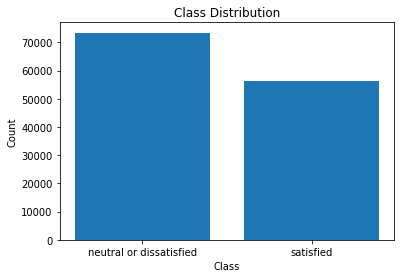

In [7]:
plt.bar(x=vc.index, height=vc.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")


We have an imbalanced dataset, since we have 73452 observations with class "neutral or
dissatisfied" and 56428 "satisfied" observations as shown in the figure above

# Correlation Analysis

In [8]:
df.corr()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.002199,0.000109,0.001160,-0.001320,0.002141,0.001388,0.003799,-0.004171,-0.000912,-0.001724,0.000485,0.000170,0.003046,-0.000626,-0.004747,-0.001990,-0.001083,0.002358,0.002099
id,0.002199,1.000000,0.020322,0.095504,-0.023096,-0.002192,0.013400,-0.000113,-0.000510,0.055538,0.052164,0.001620,0.055502,0.044088,0.074569,0.079325,0.078793,0.024048,-0.017643,-0.035657
Age,0.000109,0.020322,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248
Flight Distance,0.001160,0.095504,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935
Inflight wifi service,-0.001320,-0.023096,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749
Departure/Arrival time convenient,0.002141,-0.002192,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942
Ease of Online booking,0.001388,0.013400,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033
Gate location,0.003799,-0.000113,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658
Food and drink,-0.004171,-0.000510,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031715
Online boarding,-0.000912,0.055538,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022730


<AxesSubplot:>

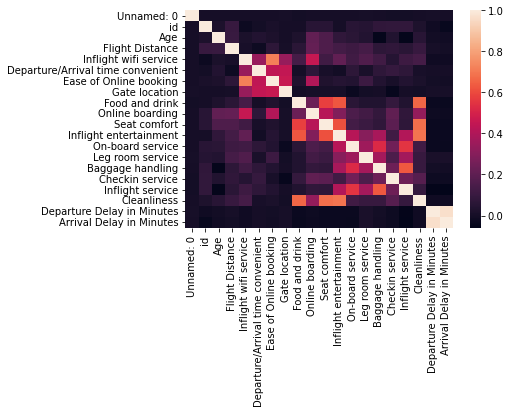

In [9]:
sns.heatmap(df.corr())

 For numeric features, if we set the threshold to be 0.90, then The only highly correlated columns are "Departure Delays in Minutes" and "Arrival Delay in Minutes" with coefficient 0.965,

# Categorical Features?

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


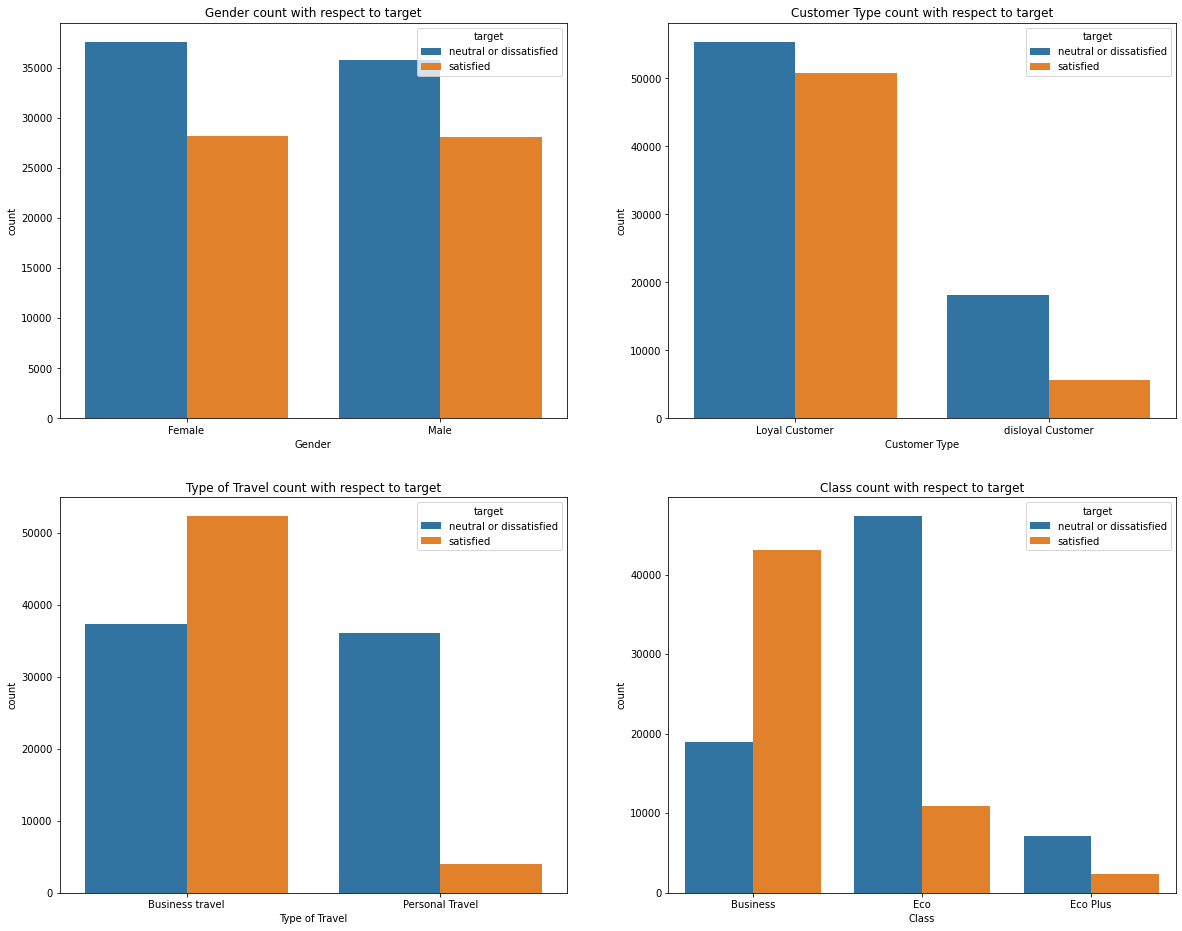

In [10]:
cat = ["Gender","Customer Type","Type of Travel","Class"]

fig,ax = plt.subplots(2,2,figsize=(20,16))
ax = ax.ravel()
print(ax)

for i in range(len(cat)):
    tempdf = df[[cat[i],"satisfaction"]].groupby(by=[cat[i],"satisfaction"]).size()
    tempdf = pd.DataFrame({"var":[i[0] for i in tempdf.index],"target":[i[1] for i in tempdf.index],"value":tempdf.values})
    sns.barplot(x=tempdf["var"],y=tempdf["value"],hue=tempdf["target"],ax=ax[i])
    ax[i].set_xlabel(cat[i])
    ax[i].set_ylabel("count")
    ax[i].set_title(cat[i]+" count with respect to target")

For Gender column, there are more female observations than male observations, and for both genders, there are more answers with 0 (neutral or dissatisfied) than answers with 1 (satisfied).</br>
For "Customer Type" column, there are considerably more observations with loyal customers than disloyal customers, and again, more observations are with answer 0.</br>
For "Type of Travel" column, more observations are made with business travel than personal travel, and for business travel, 1 answers outnumber 0 answers, but the opposite is true for personal travels.</br>
For Class column, eco plus is the class with least number of observations; the other two classes are with considerably more observations. For eco plus and eco classes, more 0 observations are made, and the opposite is true for business class.</br>

vc=df["satisfaction"].value_counts()
vc

Text(0, 0.5, 'Count')

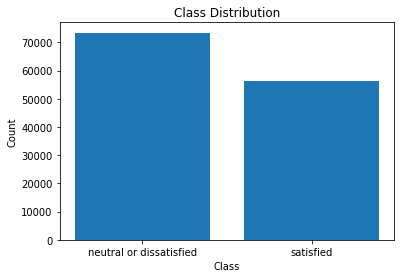

In [11]:
plt.bar(x=vc.index, height=vc.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")


In [12]:
df['Gender'] = df['Gender'].astype(str)
df['Customer Type'] = df['Customer Type'].astype(str)
df['Type of Travel'] = df['Type of Travel'].astype(str)
df['Class'] = df['Class'].astype(str)
df['satisfaction'] = df['satisfaction'].astype(str)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [13]:
#load dataset
from sklearn.model_selection import train_test_split
df = df.drop(columns=['Arrival Delay in Minutes'])
df = df.drop(columns=['id'])
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,satisfied


In [14]:
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df[cat_features])
encoded_features = encoder.transform(df[cat_features])
df[cat_features] = encoded_features
df.head()

X = df.drop(columns=['satisfaction'])
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25) 


In [15]:
from sklearn.preprocessing import StandardScaler
# Normalize dataset
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes']
target = ['satisfaction']

# Split into test/train
X_train = X_train[features]
X_test = X_test[features]

# Normalize using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


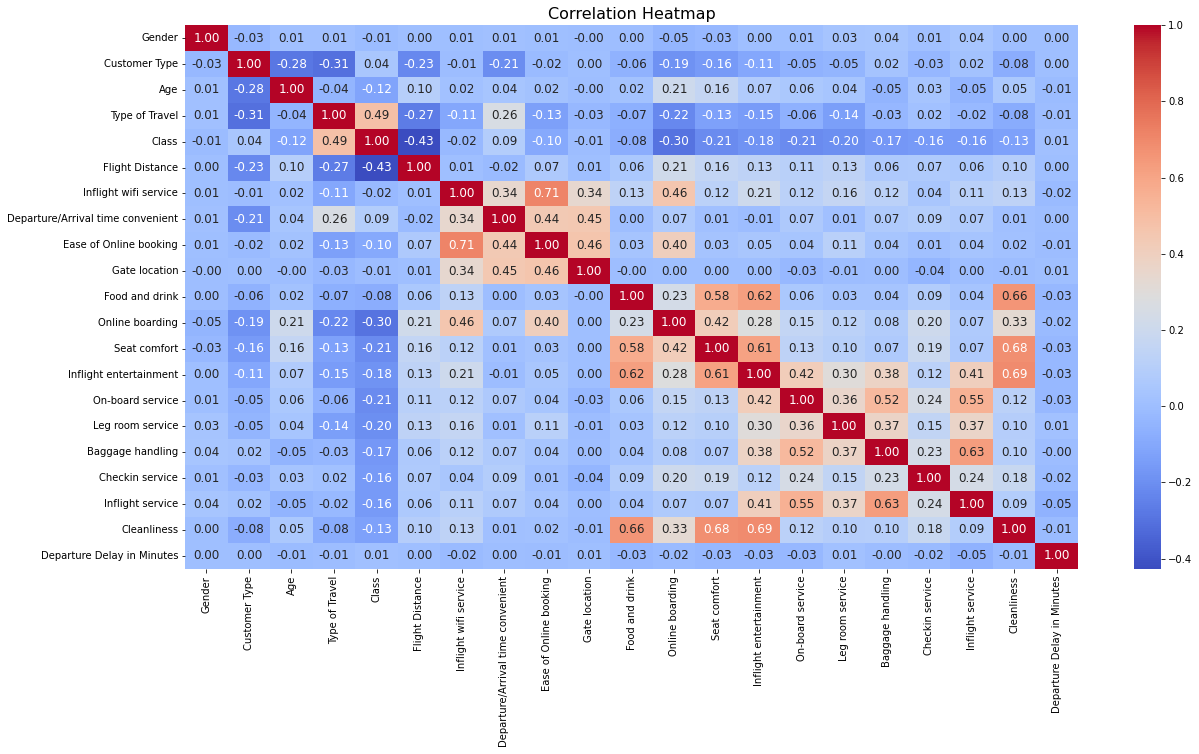

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(20, 10)) # adjust the figure size
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12}) # adjust the color map and font size

# Add a title
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


In [17]:
y_train = y_train.replace("satisfied",1) 
y_train = y_train.replace("neutral or dissatisfied",0)
y_test = y_test.replace("satisfied",1) 
y_test = y_test.replace("neutral or dissatisfied",0)

# Use Logistic Regression and Random Forest Models & Do Grid Search

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn.model_selection import GridSearchCV


log_reg_model = LogisticRegression()
rf_model = RandomForestClassifier()

log_reg_params = {
    "tol": [1e-5, 1e-4, 1e-3,1e-2],
    "C": np.logspace(-5, 5, 10),
    "class_weight":[None, "balanced"]
}

rf_params = {
    "n_estimators": [20, 50, 100],
    "max_depth": [None, 10, 50],
    "max_features": ["sqrt", "log2", None],
}

log_reg_grid = GridSearchCV(log_reg_model, log_reg_params, cv=5, scoring="f1",n_jobs=-1)
log_reg_grid.fit(X_train, y_train)


rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring="f1",n_jobs=-1)
rf_grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 50],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [20, 50, 100]},
             scoring='f1')

# Get Best Parameters of Our Models

In [21]:
print("best parameters for logistic regression:",log_reg_grid.best_params_)


best parameters for logistic regression: {'C': 0.021544346900318846, 'class_weight': None, 'tol': 1e-05}


In [22]:
print("best parameters for random forest classifier:",rf_grid.best_params_)



best parameters for random forest classifier: {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 100}


In [24]:
log_reg_grid.best_params_["C"]

0.021544346900318846

In [26]:
best_log_model = LogisticRegression(C=log_reg_grid.best_params_["C"], class_weight=log_reg_grid.best_params_["class_weight"], tol=log_reg_grid.best_params_["tol"])
best_rf_model = RandomForestClassifier(max_depth=rf_grid.best_params_["max_depth"], max_features=rf_grid.best_params_["max_features"], n_estimators=rf_grid.best_params_["n_estimators"])




# F1 Score on Test Data

In [27]:
print("f1 score on test data for logistic regression", f1_score(y_test,best_log_model.fit(X_train,y_train).predict(X_test)))

f1 score on test data for logistic regression 0.8500453309156845


In [29]:
print("f1 score on test data for random forest" ,f1_score(y_test,best_rf_model.fit(X_train,y_train).predict(X_test)))

f1 score on test data for random forest 0.9562859312289836


### RF model has higher F1 score on test data.

# Cross Validation Scores

In [ ]:
log_scores = cross_val_score(best_log_model,X_train, y_train,cv=5,scoring="f1",n_jobs=-1)
rf_scores = cross_val_score(best_rf_model,X_train,y_train,cv=5, scoring="f1",n_jobs=-1)

In [32]:
print("cv score on test data for logistic regression: ",log_scores.mean())

cv score on test data for logistic regression:  0.8531602661616636


In [33]:
print("cv score on test data for random forest: ",rf_scores.mean())

cv score on test data for random forest:  0.9564546148288


### Based on the f1 scores and cv scores, we will use the random forest model with optimal parameters.

# Random Forest Model Evaluation

In [92]:
temp = []
for i in zip(features, best_rf_model.feature_importances_):
    temp.append(i)
temp = sorted(temp,key=lambda x:x[1],reverse=False)

[('Gender', 0.004677737741699339),
 ('Food and drink', 0.011543674109668438),
 ('Departure Delay in Minutes', 0.013389444848154481),
 ('Gate location', 0.018838067437353723),
 ('Departure/Arrival time convenient', 0.019392505186075795),
 ('Cleanliness', 0.024203021106826515),
 ('Inflight service', 0.024219059690562646),
 ('Baggage handling', 0.024947253481061166),
 ('Checkin service', 0.02565302868678002),
 ('On-board service', 0.03139563267817728),
 ('Age', 0.03182813891329648),
 ('Customer Type', 0.0331912177776509),
 ('Leg room service', 0.0369800566595642),
 ('Ease of Online booking', 0.040529593133801355),
 ('Flight Distance', 0.04685116247651121),
 ('Seat comfort', 0.04755821955174579),
 ('Inflight entertainment', 0.055478857340008264),
 ('Type of Travel', 0.08702123363145106),
 ('Class', 0.09904365704845912),
 ('Inflight wifi service', 0.14992186275378724),
 ('Online boarding', 0.17333657574736505)]

Text(0, 0.5, 'Feature Name')

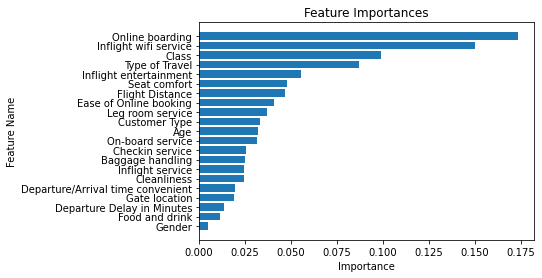

In [94]:
plt.barh([i[0] for i in temp],[i[1] for i in temp])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature Name")

### From the above plot, we see that "Online Boarding" is the most important factor in determining the satisfaction level of customers, and "Inflihg wifi service" is the second most important. The third most important factor is "Class". The result here makes sense since these services are important for passenger's experience on board in common sense. The least immportant factor is Gender, which also makes sense because gender naturally does not play a crucial role in the scenario here.